<a href="https://colab.research.google.com/github/krauseannelize/nb-ml-ms-exercises/blob/main/notebooks/03_ml_model_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 | ML Model: Regression Data

## Lecture Walkthrough

In [2]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical operations and arrays
import numpy as np

# Import Matplotlib for data visualization and plotting
import matplotlib.pyplot as plt

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read regression dataset as pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/regression-data.csv')

Mounted at /content/drive


In [4]:
# Inspect shape of the dataset
print(f"Dataset shape\nRows: {data.shape[0]}\nColumns: {data.shape[1]}")

Dataset shape
Rows: 50
Columns: 2


In [5]:
# Preview first 10 rows of dataset
data.head(10)

,x,y
0,4.081633,3.075314
1,4.285714,2.939661
2,5.714286,3.975521
3,4.693878,3.294349
4,2.040816,2.410844
5,7.346939,4.650073
6,8.775510,5.210052
7,9.183673,5.385219
8,4.897959,3.304232
9,8.571429,5.350946


### Visualize the Data

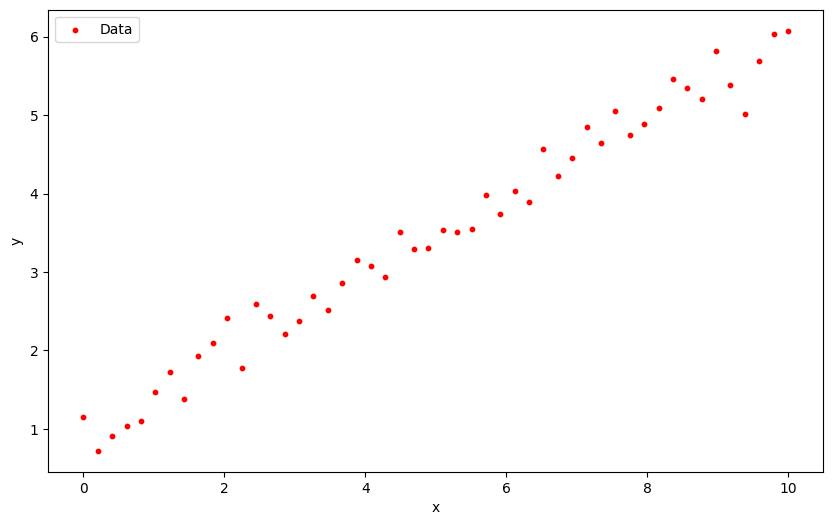

In [6]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatterplot of x and y
plt.scatter(data['x'], data['y'], label='Data', color='red', s=10)

# Add labels for the axes and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.show()

### Train/Test Split

It is a good practice to reserve 10-20% of a dataset as a test set.

In [7]:
# Import function to split a dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Split the DataFrame 'data' into training and testing sets
# - test_size=0.1 → 10% of the data goes into the test set
# - random_state=42 → ensures reproducibility of the split
# - shuffle=True → shuffle the data before splitting (default is True, emphasized here)
df_train, df_test = train_test_split(data,
                                     test_size=0.1,
                                     random_state=42,
                                     shuffle=True
                                     )

# Print the shape of the resulting train and test DataFrames
print("df_train shape: ", df_train.shape)
print("df_test shape: ", df_test.shape)

# Preview the first 2 rows of the training set
df_train.head(2)

df_train shape:  (45, 2)
df_test shape:  (5, 2)


,x,y
48,6.938776,4.456379
26,1.632653,1.925255


**Now** we want to perform a linear regression. What is the simplest model we can choose?


\begin{gather*}
    \hat{y} = f(x) = ax + b
\end{gather*}

In accordance with what we said earlier in the lecture:

- The linear shape is our inductive bias

- $\hat{y}$ is an alternative notation used to represent the model's prediction $f(x)$.

- We need a way to measure how well our model performed. We achieve this using a loss function.

- Loss function in this case is called the squared-error:
  - $loss(y, \hat{y}) = (y - \hat{y})^2$

- Then we can sum up all the losses for all the points in the train dataset:

  - sum_of_all_losses = $(y_1 - \hat{y}_1)^2 + ... + (y_{45} - \hat{y}_{45})^2$
  
- Then we calculate the train-error by taking the average amount:
  - train-error = $\frac{(y_1 - \hat{y}_1)^2 + ... + (y_{45} - \hat{y}_{45})^2}{45}$


- In general, this type of loss function is used for regression problems and is called "mean-squared-error" because we calculate the mean of all the squared errors. It is denoted as "mse".

- For different values of $a$ and $b$, we end up getting different values for mse. The job of our machine learning algorithm is to find those values of $a$ and $b$ which minimizes the mse. This is called the best fitting line.

- In practice, we don't solve the optimization problem ourseleves. Python can achieve all of this for us.

In [9]:
# Split features and target into training and testing sets
# .values.reshape(-1, 1) converts the 'x' column into a 2D array (required by scikit-learn)
X_train, y_train = df_train['x'].values.reshape(-1, 1), df_train['y'].values
X_test, y_test   = df_test['x'].values.reshape(-1, 1), df_test['y'].values

# Preview the first 5 elements of the training set
print(X_train[:5])

[[6.93877551]
 [1.63265306]
 [3.26530612]
 [7.14285714]
 [6.32653061]]


In [10]:
# Import LinearRegression model and mean_squared_error metric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Fit (train) the model on the training data
# X_train → input features, y_train → target values
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Original values (features and targets already split into train/test sets)
X_train, y_train
X_test, y_test

(array([[1.2244898 ],
        [8.97959184],
        [6.53061224],
        [1.83673469],
        [7.95918367]]),
 array([1.71880147, 5.82197057, 4.56945951, 2.08877836, 4.8869931 ]))

In [12]:
# Make predictions on both training and testing data
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [ ]:
# Compare predictions with actual values
# (difference = residuals → how far off the predictions are)
y_pred_train - y_train
y_pred_test - y_test

In [13]:
# Compare predictions with actual values to see how far off they are
y_pred_train - y_train

array([-0.02778672, -0.18110963, -0.12110939, -0.31478121,  0.22492561,
        0.09168532, -0.46020246,  0.07645328,  0.09188111, -0.00148409,
        0.14777221, -0.03525128, -0.01139004, -0.03935031,  0.3016704 ,
       -0.09636989, -0.32057793,  0.27448871, -0.23729358, -0.31953235,
       -0.09219346, -0.30550756,  0.09014343, -0.09863384, -0.01498528,
        0.15869767, -0.08517949,  0.10075053,  0.14670802, -0.17537077,
       -0.16641676, -0.03987433,  0.23422277,  0.65706826,  0.18917623,
       -0.43984167,  0.09111854, -0.27469506,  0.14953412,  0.21340932,
        0.17910085, -0.16321999,  0.16307471,  0.26185624,  0.17841974])

In [14]:
# Compare predictions with actual values to see how far off they are
y_pred_test - y_test

array([-0.18115204, -0.36089878, -0.34736321, -0.24138506,  0.0578389 ])

In [15]:
# Evaluate the model using Mean Squared Error (MSE)
# - MSE measures the average squared difference between predictions and actual values
# - Lower MSE = better fit
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test, y_pred_test)

# Print the error for both training and test sets
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.048694805122530126
Test MSE: 0.06906745548469907


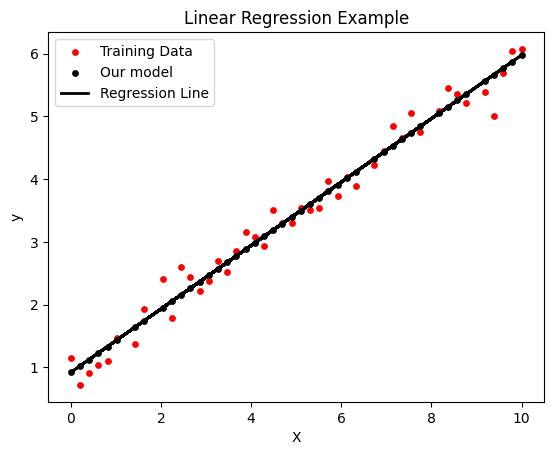

In [16]:
# Set market size for scatterplots
size = 15

# Plot the training data points (red dots)
plt.scatter(X_train, y_train, color='red', label='Training Data', s=size)

# Plot the model's predicted values as black dots
plt.scatter(X_train, y_pred_train, color='black', label='Our model', s=size)

# Plot the regression line through the predicted values
plt.plot(X_train, y_pred_train, color='black', label='Regression Line', linewidth=2)

# Add axis labels, legend, and title for clarity
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Example')

# Display the plot
plt.show()

## Practice Exercise

Please visualize data, and fit a Linear Regression model to it and visualize the resulting line.

In [17]:
# Read regression exercise dataset as pandas DataFrame
data_ex = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/regression-data-exercise.csv')

In [18]:
# Inspect shape of the dataset
print(f"Dataset shape\nRows: {data_ex.shape[0]}\nColumns: {data_ex.shape[1]}")

Dataset shape
Rows: 700
Columns: 2


In [19]:
# Preview first 10 rows of dataset
data_ex.head(10)

,x,y
0,-3.347639,-6.940856
1,2.403433,7.895086
2,9.871245,30.748011
3,-7.725322,-11.254923
4,1.330472,7.063340
5,6.824034,15.458920
6,9.227468,25.499335
7,-4.248927,-10.219439
8,-7.854077,-13.014773
9,10.557940,36.992724


In [20]:
# View summary statistics of the dataset
data_ex.describe()

,x,y
count,700.000000,700.000000
mean,5.000000,17.459270
std,8.678836,22.236842
min,-10.000000,-28.171551
25%,-2.500000,-0.847132
50%,5.000000,17.510661
75%,12.500000,35.932569
max,20.000000,63.038473


### Visualize the Data

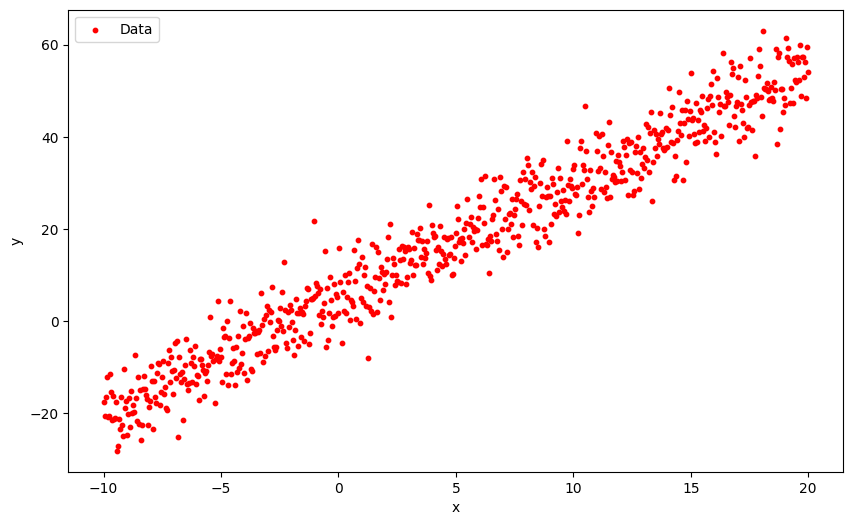

In [21]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatterplot of x and y
plt.scatter(data_ex['x'], data_ex['y'], label='Data', color='red', s=10)

# Add labels for the axes and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.show()

### Train/Test Split

In [22]:
# Import function to split a dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Split the DataFrame 'data' into training and testing sets
# - test_size=0.1 → 10% of the data goes into the test set
# - random_state=42 → ensures reproducibility of the split
# - shuffle=True → shuffle the data before splitting (default is True, emphasized here)
df_ex_train, df_ex_test = train_test_split(data_ex,
                                     test_size=0.1,
                                     random_state=42,
                                     shuffle=True
                                     )

# Print the shape of the resulting train and test DataFrames
print("df_ex_train shape: ", df_ex_train.shape)
print("df_ex_test shape: ", df_ex_test.shape)

# Preview the first 2 rows of the training set
df_ex_train.head(2)

df_ex_train shape:  (630, 2)
df_ex_test shape:  (70, 2)


,x,y
340,15.364807,41.023730
2,9.871245,30.748011


In [23]:
# Split features and target into training and testing sets
# .values.reshape(-1, 1) converts the 'x' column into a 2D array (required by scikit-learn)
X_ex_train, y_ex_train = df_ex_train['x'].values.reshape(-1, 1), df_ex_train['y'].values
X_ex_test, y_ex_test = df_ex_test['x'].values.reshape(-1, 1), df_ex_test['y'].values

# Preview the first 5 elements of the training set
X_ex_train[:5]

array([[15.36480687],
       [ 9.87124464],
       [-4.29184549],
       [ 0.77253219],
       [15.2360515 ]])

In [24]:
X_ex_test[:5]

array([[ 6.60944206],
       [-4.97854077],
       [-9.91416309],
       [ 6.69527897],
       [16.43776824]])

In [25]:
# Print the average of the test labels
print(f"Mean of y_ex_test (average value in test set): {np.mean(y_ex_test):.3f}")

# Print the average of the train labels
print(f"Mean of y_ex_train (average value in train set): {np.mean(y_ex_train):.3f}")

Mean of y_ex_test (average value in test set): 15.098
Mean of y_ex_train (average value in train set): 17.722


In [26]:
# Initialize the linear regression model
model_ex = LinearRegression()

# Fit (train) the model on the training data
# X_ex_train → input features, y_ex_train → target values
model_ex.fit(X_ex_train, y_ex_train)

LinearRegression()

In [27]:
# Make predictions on both training and testing data
y_pred_ex_train = model_ex.predict(X_ex_train)
y_pred_ex_test = model_ex.predict(X_ex_test)

In [28]:
# Print the average of the predicted test labels
print(f"Mean of y_pred_ex_test (average value in test set): {np.mean(y_pred_ex_test):.3f}")

# Print the average of the predicted train labels
print(f"Mean of y_pred_ex_train (average value in train set): {np.mean(y_pred_ex_train):.3f}")

Mean of y_pred_ex_test (average value in test set): 14.463
Mean of y_pred_ex_train (average value in train set): 17.722


In [29]:
# Evaluate the model using Mean Squared Error (MSE)
# - MSE measures the average squared difference between predictions and actual values
# - Lower MSE = better fit
mse_ex_train = mean_squared_error(y_ex_train, y_pred_ex_train)
mse_ex_test = mean_squared_error(y_ex_test, y_pred_ex_test)

# Print the error for both training and test sets
print("Train MSE:", mse_ex_train)
print("Test MSE:", mse_ex_test)

Train MSE: 23.556835380487477
Test MSE: 30.594241084233435


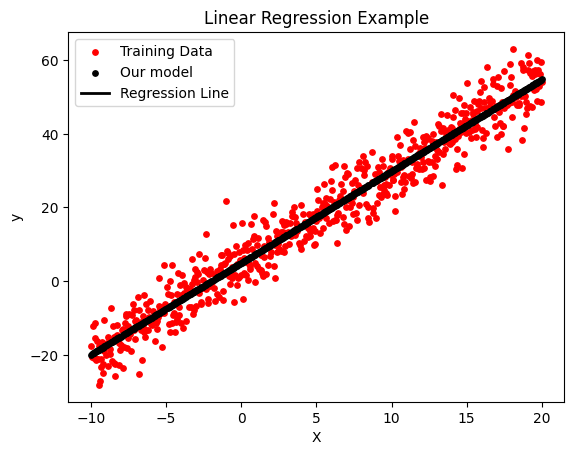

In [30]:
# Set market size for scatterplots
size = 15

# Plot the training data points (red dots)
plt.scatter(X_ex_train, y_ex_train, color='red', label='Training Data', s=size)

# Plot the model's predicted values as black dots
plt.scatter(X_ex_train, y_pred_ex_train, color='black', label='Our model', s=size)

# Plot the regression line through the predicted values
plt.plot(X_ex_train, y_pred_ex_train, color='black', label='Regression Line', linewidth=2)

# Add axis labels, legend, and title for clarity
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Example')

# Display the plot
plt.show()